# Trees, Forests & Ensembles

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

/Users/zhanglvou/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/zhanglvou/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/zhanglvou/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/Users/zhanglvou/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Impurity measurements: gini index, cross-entropy

## Tests

### Trees, visualizations, pruning

0.9953051643192489
0.951048951048951


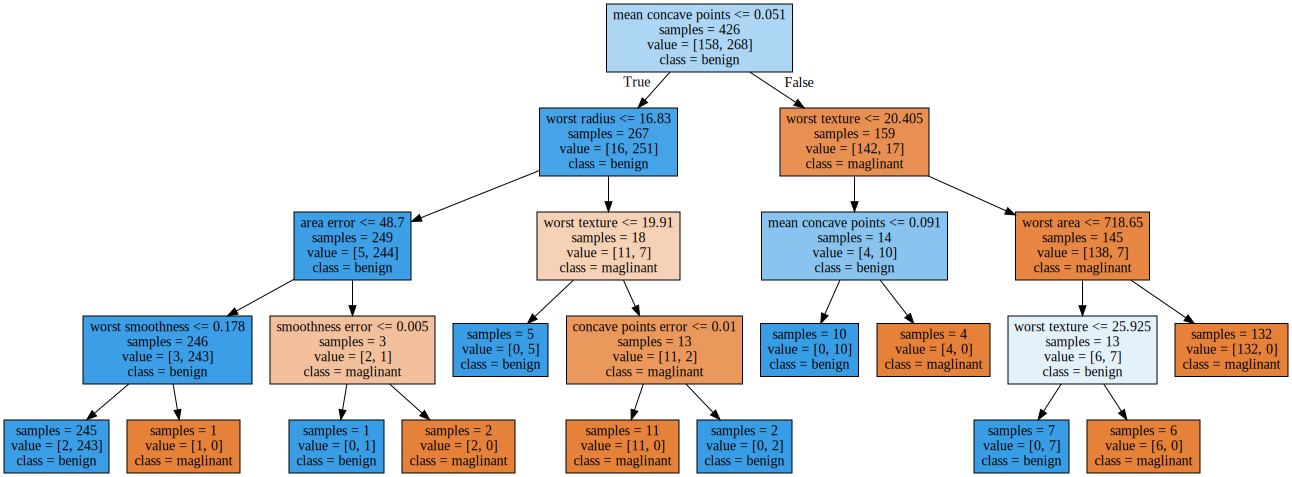

In [17]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 42)

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 4)
tree.fit(X_train, y_train)

print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

from sklearn.tree import export_graphviz
export_graphviz(tree, out_file = 'tree.dot', class_names = ['maglinant', 'benign'], feature_names= cancer.feature_names, impurity = False, filled = True)

# plot the tree
import graphviz
with open('tree.dot') as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)


### Tree properties

- feature importances

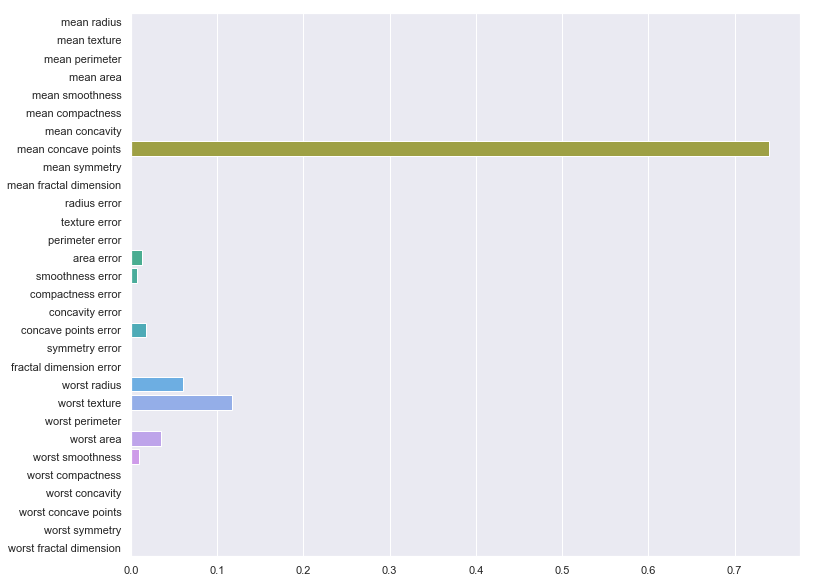

In [18]:
fig, ax = plt.subplots(figsize = (12, 10))

sns.barplot(y = cancer.feature_names, x = tree.feature_importances_, ax = ax)

In [21]:
# random forests
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 100, noise = 0.25, random_state = 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
forest = RandomForestClassifier(n_estimators = 5, random_state = 2)
forest.fit(X_train, y_train)
forest.predict_proba(X_test)[:5]

array([[0.8, 0.2],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.8, 0.2]])

1.0
0.972027972027972


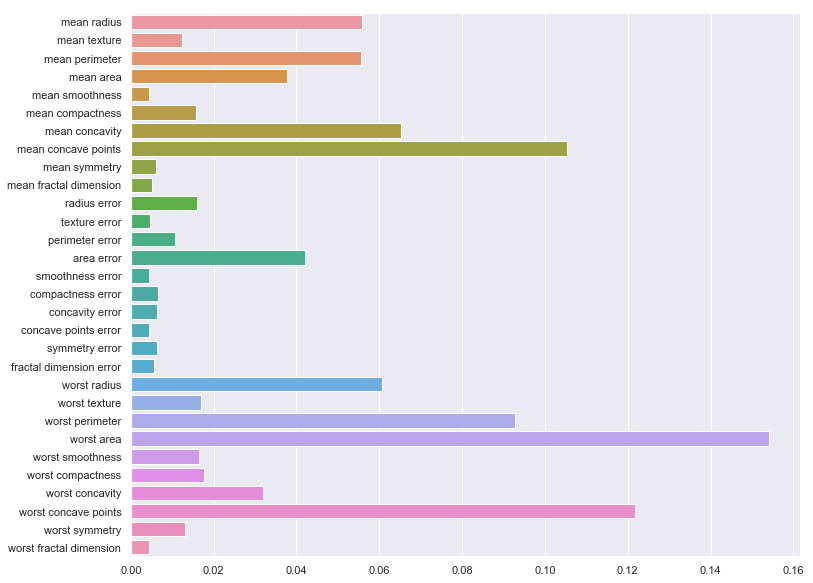

In [23]:
# random forest trying on breast cancer data
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)
forest = RandomForestClassifier(n_estimators= 100, random_state = 42)
forest.fit(X_train, y_train)

print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

fig, ax = plt.subplots(figsize = (12, 10))

sns.barplot(x = forest.feature_importances_, y = cancer.feature_names, ax = ax)